In [708]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline
import pandas as pd
import glob

In [1552]:
N_steps = 5000
kappa = 0.6
kappastr = f"{kappa:.2f}"
L = 32
R = 1000 
mode = "t"
modestr = "Two-Replica_Method" if (mode == "t") else "Wolff_Method"

dirpath = f"/Users/shanekeiser/Downloads/production-run/{modestr}/{kappastr}_kappa/{L}_L/{R}_R"
filepattern = f"emcx_data_*"
files = glob.glob(f"{dirpath}/{filepattern}")

In [710]:
def getObs(fname, qty_number):
    df = pd.read_csv(fname)
    betas = df["Beta"]
    header = list(df)[qty_number]
    observable = df[header]
    obs_interp = make_interp_spline(betas,observable,k=3)

    beta_model = np.linspace(0.1,2,N_steps)
    obs_model = obs_interp(beta_model)
    return obs_model

def getlastFE(fname):
    df = pd.read_csv(fname)
    betas = df["Beta"]
    FE = -1*df["Free Energy"]/df["Beta"] # need to manipulate F a little, based on what is calculated in C++
    
    FE_interp = make_interp_spline(betas,FE,k=3)
    beta_model = np.linspace(0.1,2.5,N_steps)
    FE_model = FE_interp(beta_model)
    return FE_model[-200]

In [711]:
beta_model = np.linspace(0.1,2.5,N_steps)
obs_array = np.empty(shape = (len(files),N_steps))
FE_array = np.empty(len(files))
quantity = 11
for i in range(len(files)):
    obs_array[i] = getObs(files[i],quantity)
    FE_array[i] = getlastFE(files[i])

obs_means = np.empty(N_steps)
obs_stds = np.empty(N_steps)
for i in range(N_steps):
    obs_means[i] = np.mean(obs_array[:,i])
    obs_stds[i] = np.std(obs_array[:,i])

FE_mean = np.mean(FE_array)
FE_std = np.std(FE_array)
# print(f"<F> = {FE_mean} +/- {FE_std}")

# plt.errorbar(beta_model, obs_means, obs_stds)
# plt.show()

In [712]:
def getErrorBarPlot(kappa,L,R,mode, quantity): ## This might be depreciated as these are not weighted averages
    modestr = "Two-Replica_Method" if (mode == "t") else "Wolff_Method"
    dirpath = f"/Users/shanekeiser/Downloads/production-run/{modestr}/{kappastr}_kappa/{L}_L/{R}_R"
    filepattern = f"emcx_data_*"
    files = glob.glob(f"{dirpath}/{filepattern}")
    # beta_model = np.linspace(0.1,2.5,N_steps)
    obs_array = np.empty(shape = (len(files),N_steps))
    FE_array = np.empty(len(files))
    for i in range(len(files)):
        obs_array[i] = getObs(files[i],quantity)
        FE_array[i] = getlastFE(files[i])

    obs_means = np.empty(N_steps)
    obs_stds = np.empty(N_steps)
    for i in range(N_steps):
        obs_means[i] = np.mean(obs_array[:,i])
        obs_stds[i] = np.std(obs_array[:,i])

    return obs_means, obs_stds

In [713]:
def compareQuantity(kappa,L,R,quantity):
    kappastr = f"{kappa:.2f}"
    dirpath = f"/Users/shanekeiser/Downloads/production-run/Two-Replica_Method/{kappastr}_kappa/{L}_L/{R}_R"
    filepattern = f"emcx_data_*"
    filepattern_2 = f"param_info_*"
    files = glob.glob(f"{dirpath}/{filepattern}")
    df = pd.read_csv(files[0])
    # p_info = np.loadtxt(glob.glob(f"{dirpath}/{filepattern_2}")[0])
    header = list(df)[quantity]

    t_means, t_stds = getErrorBarPlot(kappa = kappa,L = L, R = R,mode = "t", quantity = quantity)
    p_means, p_stds = getErrorBarPlot(kappa = kappa,L = L, R = R,mode = "p", quantity = quantity)
    beta_vals = np.linspace(0.1,2.5,N_steps)
    
    
    plt.errorbar(beta_vals, t_means, t_stds, marker = '.', markersize = 0.5, color = 'b', label = "Two Replica", linewidth = 0)
    plt.errorbar(beta_vals, p_means, p_stds, marker = '.', markersize = 0.5, color = 'r', label = "Wolff", linewidth = 0)
    plt.errorbar(beta_vals, t_means, t_stds, color = 'b', linewidth = 0.5, alpha = 0.5)
    plt.errorbar(beta_vals, p_means, p_stds, color = 'r', linewidth = 0.5, alpha = 0.5)
    plt.legend()
    plt.title(f"Average over {len(files)} runs for {header}\n"\
              + f"L = {L}, R = {R}, " + r"$\kappa$" + f" = {kappa}")
    plt.show()

In [714]:
def getMeanFE(kappa,L,R,mode):
    kappastr = f"{kappa:.2f}"
    modestr = "Two-Replica_Method" if (mode == "t") else "Wolff_Method"
    dirpath = f"/Users/shanekeiser/Downloads/production-run/{modestr}/{kappastr}_kappa/{L}_L/{R}_R"
    filepattern = f"emcx_data_*"
    files = glob.glob(f"{dirpath}/{filepattern}")
    # beta_model = np.linspace(0.1,2.5,N_steps)
    FE_array = np.empty(len(files))
    for i in range(len(files)):
        FE_array[i] = getlastFE(files[i])/(L*L)


    FE_mean = np.mean(FE_array)
    FE_std = np.std(FE_array)
    # print(f"<F> = {FE_mean} +/- {FE_std}")

    return FE_mean, FE_std

In [181]:
### FIX THIS

def getUnbiasedFE(kappa,L,R,mode):
    kappastr = f"{kappa:.2f}"
    modestr = "Two-Replica_Method" if (mode == "t") else "Wolff_Method"
    dirpath = f"/Users/shanekeiser/Downloads/production-run/{modestr}/{kappastr}_kappa/{L}_L/{R}_R"
    filepattern = f"emcx_data_*"
    files = glob.glob(f"{dirpath}/{filepattern}")
    beta_model = np.linspace(0.1,2.5,N_steps)   
    FE_interp_vals = np.empty(shape = (len(files), N_steps))
    unbiased_FE = np.empty(N_steps)
    for i in range(len(files)):
        df = pd.read_csv(files[i])
        betas = df["Beta"]
        FE = df["Free Energy"]/(L*L) # need to manipulate F a little, based on what is calculated in C++
        FE_interp = make_interp_spline(betas,FE,k=3)
        FE_model = FE_interp(beta_model)
        FE_interp_vals[i,:] = FE_model
    
    for i in range(N_steps):
        unbiased_FE[i] = np.log((1/len(files))*np.sum(np.exp(FE_interp_vals[:,i])))
        unbiased_FE[i] *= -1/beta_model[i]
        unbiased_FE[i]
    return unbiased_FE

In [1435]:
def getProbFindGS(kappa,L,R,quantity):
    kappastr = f"{kappa:.2f}"
    dirpath_t = f"/Users/shanekeiser/Downloads/production-run/Two-Replica_Method/{kappastr}_kappa/{L}_L/{R}_R"
    dirpath_w = f"/Users/shanekeiser/Downloads/production-run/Wolff_Method/{kappastr}_kappa/{L}_L/{R}_R"
    filepattern = f"emcx_data_*"
    filepattern_2 = f"param_info_*"
    files_t = glob.glob(f"{dirpath_t}/{filepattern}")
    files_w = glob.glob(f"{dirpath_w}/{filepattern}")
    df_t = pd.read_csv(files_t[0])
    df_w = pd.read_csv(files_w[0])
    # p_info = np.loadtxt(glob.glob(f"{dirpath}/{filepattern_2}")[0])
    header = list(df_t)[quantity]

    final_val = 0 # Placeholder

    if quantity == 11 and kappa > 0.5: # Which other quantities can we use?
        final_val = 0.25

    gs_found_counter_t = 0
    gs_found_counter_w = 0
    obs_array_t = np.empty(shape = (len(files_t)))
    obs_array_w = np.empty(shape = (len(files_w)))

    for i in range(len(files_t)):
        obs_array_t[i] = getObs(files_t[i],quantity)[-1]
        if np.abs(obs_array_t[i] - final_val) < 1e-4: # 1e-4 tolerance
            gs_found_counter_t += 1
    for i in range(len(files_w)):
        obs_array_w[i] = getObs(files_w[i],quantity)[-1]
        if np.abs(obs_array_w[i] - final_val) < 1e-4: # 1e-4 tolerance
            gs_found_counter_w += 1
    
    prob_t = gs_found_counter_t/len(files_t)
    prob_w = gs_found_counter_w/len(files_w)
    
    print("Probability of reaching k = 1/4 (Dominant wavenumber)")
    print(f"R = {R}, L = {L}, kappa = {kappa}")
    print(f"For TR: {prob_t} | For Wolff: {prob_w}")



In [1436]:
# Using some earlier functions

comparer = 11
# compareQuantity(kappa = 0.6, L = 32, R = 1000, quantity = comparer)
# compareQuantity(kappa = 0.6, L = 32, R = 2000, quantity = comparer)
# compareQuantity(kappa = 0.6, L = 32, R = 5000, quantity = comparer)
# compareQuantity(kappa = 0.6, L = 32, R = 16000, quantity = comparer)

getProbFindGS(kappa=0.6,L=48,R=4000,quantity=11)
getProbFindGS(kappa=0.6,L=48,R=8000,quantity=11)
getProbFindGS(kappa=0.6,L=48,R=16000,quantity=11)
# getProbFindGS(kappa=0.6,L=48,R=32000,quantity=11)

Probability of reaching k = 1/4 (Dominant wavenumber)
R = 4000, L = 48, kappa = 0.6
For TR: 1.0 | For Wolff: 0.0
Probability of reaching k = 1/4 (Dominant wavenumber)
R = 8000, L = 48, kappa = 0.6
For TR: 1.0 | For Wolff: 0.0
Probability of reaching k = 1/4 (Dominant wavenumber)
R = 16000, L = 48, kappa = 0.6
For TR: 1.0 | For Wolff: 0.0


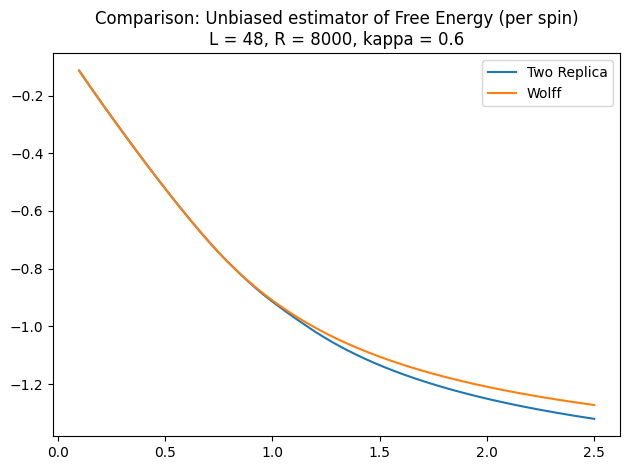

In [186]:
# Unbiased Estimator of FE

kappa_uFE = 0.6
L_uFE = 48
R_uFE = 8000
unbiased_FE_t = getUnbiasedFE(kappa = 0.6, L = L_uFE, R = R_uFE, mode = "t")
unbiased_FE_p = getUnbiasedFE(kappa = 0.6, L = L_uFE, R = R_uFE, mode = "p")

plt.plot(beta_model, unbiased_FE_t, label = "Two Replica")
plt.plot(beta_model, unbiased_FE_p, label = "Wolff")
plt.title("Comparison: Unbiased estimator of Free Energy (per spin)" + f"\nL = {L_uFE}, R = {R_uFE}, kappa = {kappa_uFE}")
plt.legend()
plt.tight_layout()
plt.show()



In [146]:
### Get rho_F (R * Var(beta * F))

def getRhoF(kappa,L,R,mode):
    kappastr = f"{kappa:.2f}"
    modestr = "Two-Replica_Method" if (mode == "t") else "Wolff_Method"
    dirpath = f"/Users/shanekeiser/Downloads/production-run/{modestr}/{kappastr}_kappa/{L}_L/{R}_R"
    filepattern = f"emcx_data_*"
    files = glob.glob(f"{dirpath}/{filepattern}")
    # beta_model = np.linspace(0.1,2.5,N_steps)
    FE_array = np.empty(shape = (len(files), N_steps))

    for i in range(len(files)):
        df = pd.read_csv(files[i])
        betas = df["Beta"]
        FE = df["Free Energy"]
        FE_interp = make_interp_spline(betas,FE,k=3)
        beta_model = np.linspace(0.1,2.5,N_steps)
        FE_array[i,:] = FE_interp(beta_model)

    var_FE = np.zeros(N_steps)
    rho_FE = np.zeros(N_steps)
    std_error_FE = np.zeros(N_steps)
    for j in range(N_steps):
        var_FE[j] = np.std(FE_array[:,j])**2
        rho_FE[j] = R*var_FE[j]
        std_error_FE[j] = (1/np.sqrt(len(files)))*np.std(FE_array[:,j])
    plt.plot(beta_model, rho_FE, label = f"R = {R}")
    return rho_FE

def getSE_FE(kappa,L,R,mode):
    kappastr = f"{kappa:.2f}"
    modestr = "Two-Replica_Method" if (mode == "t") else "Wolff_Method"
    dirpath = f"/Users/shanekeiser/Downloads/production-run/{modestr}/{kappastr}_kappa/{L}_L/{R}_R"
    filepattern = f"emcx_data_*"
    files = glob.glob(f"{dirpath}/{filepattern}")
    # beta_model = np.linspace(0.1,2.5,N_steps)
    FE_array = np.empty(shape = (len(files), N_steps))

    for i in range(len(files)):
        df = pd.read_csv(files[i])
        betas = df["Beta"]
        FE = df["Free Energy"]
        FE_interp = make_interp_spline(betas,FE,k=3)
        beta_model = np.linspace(0.1,2.5,N_steps)
        FE_array[i,:] = FE_interp(beta_model)

    var_FE = np.zeros(N_steps)
    rho_FE = np.zeros(N_steps)
    std_error_FE = np.zeros(N_steps)
    for j in range(N_steps):
        var_FE[j] = np.std(FE_array[:,j])**2
        rho_FE[j] = R*var_FE[j]
        std_error_FE[j] = (1/np.sqrt(len(files)))*np.std(FE_array[:,j])
    plt.plot(beta_model, std_error_FE, label = f"R = {R}")
    return std_error_FE

def getVarF(kappa,L,R,mode):
    kappastr = f"{kappa:.2f}"
    modestr = "Two-Replica_Method" if (mode == "t") else "Wolff_Method"
    dirpath = f"/Users/shanekeiser/Downloads/production-run/{modestr}/{kappastr}_kappa/{L}_L/{R}_R"
    filepattern = f"emcx_data_*"
    files = glob.glob(f"{dirpath}/{filepattern}")
    # beta_model = np.linspace(0.1,2.5,N_steps)
    FE_array = np.empty(shape = (len(files), N_steps))
    beta_model = np.linspace(0.1,2.5,N_steps)
    for i in range(len(files)):
        df = pd.read_csv(files[i])
        betas = df["Beta"]
        FE = df["Free Energy"]
        FE_interp = make_interp_spline(betas,FE,k=3)
        FE_array[i,:] = FE_interp(beta_model)

    var_FE = np.zeros(N_steps)
    rho_FE = np.zeros(N_steps)
    std_error_FE = np.zeros(N_steps)
    for j in range(N_steps):
        var_FE[j] = np.std(FE_array[:,j])**2
        rho_FE[j] = R*var_FE[j]
        std_error_FE[j] = (1/np.sqrt(len(files)))*np.std(FE_array[:,j])

    plt.plot(beta_model, var_FE, label = f"R = {R}")
    return var_FE



    

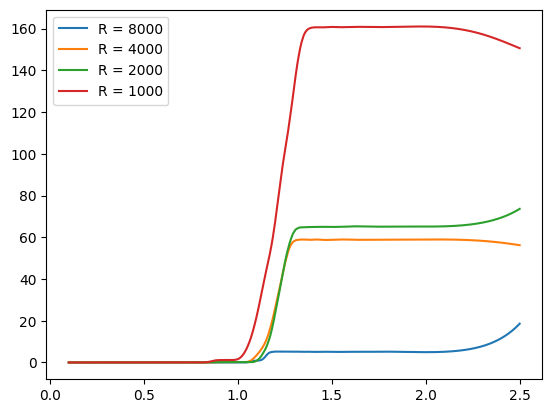

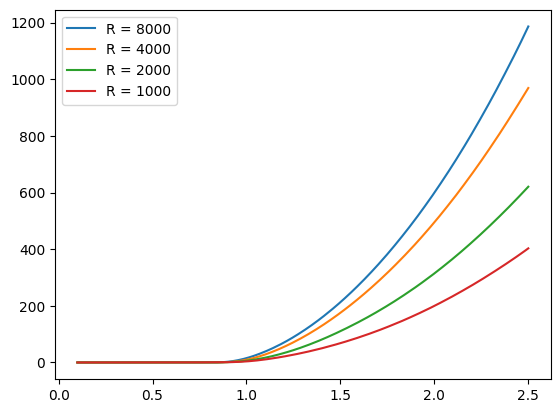

In [189]:
L_val = 48

# varF_t_1 = getVarF(kappa=0.6,L=L_val,R=16000,mode="t")
varF_t_2 = getVarF(kappa=0.6,L=L_val,R=8000,mode="t")
varF_t_3 = getVarF(kappa=0.6,L=L_val,R=4000,mode="t")
varF_t_4 = getVarF(kappa=0.6,L=L_val,R=2000,mode="t")
varF_t_5 = getVarF(kappa=0.6,L=L_val,R=1000,mode="t")
plt.legend()
plt.show()

# varF_p_1 = getVarF(kappa=0.6,L=L_val,R=16000,mode="p")
varF_p_2 = getVarF(kappa=0.6,L=L_val,R=8000,mode="p")
varF_p_3 = getVarF(kappa=0.6,L=L_val,R=4000,mode="p")
varF_p_4 = getVarF(kappa=0.6,L=L_val,R=2000,mode="p")
varF_p_5 = getVarF(kappa=0.6,L=L_val,R=1000,mode="p")
plt.legend()
plt.show()

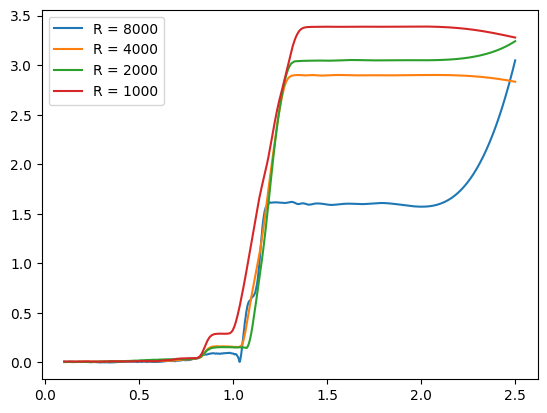

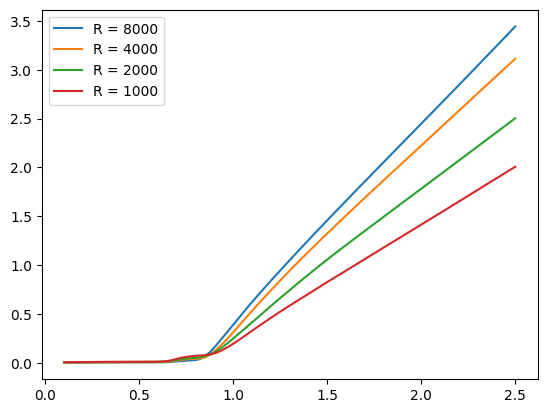

In [319]:
L_val = 48

# varF_t_1 = getSE_FE(kappa=0.6,L=L_val,R=16000,mode="t")
varF_t_2 = getSE_FE(kappa=0.6,L=L_val,R=8000,mode="t")
varF_t_3 = getSE_FE(kappa=0.6,L=L_val,R=4000,mode="t")
varF_t_4 = getSE_FE(kappa=0.6,L=L_val,R=2000,mode="t")
varF_t_5 = getSE_FE(kappa=0.6,L=L_val,R=1000,mode="t")
plt.legend()
plt.show()

# varF_p_1 = getSE_FE(kappa=0.6,L=L_val,R=16000,mode="p")
varF_p_2 = getSE_FE(kappa=0.6,L=L_val,R=8000,mode="p")
varF_p_3 = getSE_FE(kappa=0.6,L=L_val,R=4000,mode="p")
varF_p_4 = getSE_FE(kappa=0.6,L=L_val,R=2000,mode="p")
varF_p_5 = getSE_FE(kappa=0.6,L=L_val,R=1000,mode="p")
plt.legend()
plt.show()

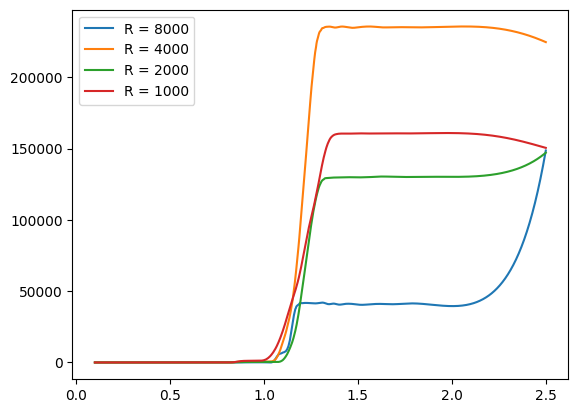

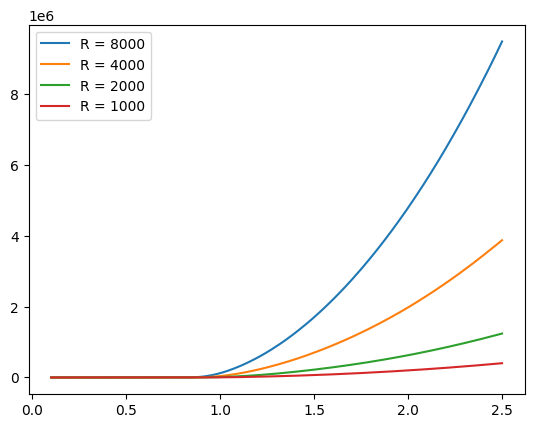

In [193]:
L_val = 48

# varF_t_1 = getRhoF(kappa=0.6,L=L_val,R=16000,mode="t")
varF_t_2 = getRhoF(kappa=0.6,L=L_val,R=8000,mode="t")
varF_t_3 = getRhoF(kappa=0.6,L=L_val,R=4000,mode="t")
varF_t_4 = getRhoF(kappa=0.6,L=L_val,R=2000,mode="t")
varF_t_5 = getRhoF(kappa=0.6,L=L_val,R=1000,mode="t")
plt.legend()
plt.show()

# varF_p_1 = getRhoF(kappa=0.6,L=L_val,R=16000,mode="p")
varF_p_2 = getRhoF(kappa=0.6,L=L_val,R=8000,mode="p")
varF_p_3 = getRhoF(kappa=0.6,L=L_val,R=4000,mode="p")
varF_p_4 = getRhoF(kappa=0.6,L=L_val,R=2000,mode="p")
varF_p_5 = getRhoF(kappa=0.6,L=L_val,R=1000,mode="p")
plt.legend()
plt.show()

In [1697]:
from scipy.stats import bootstrap

### Let's start from the beginning, shall we?

N_steps = 5000
beta_model = np.linspace(0.1,2.5,N_steps)


dirpath = f"/Users/shanekeiser/Downloads/production-run/{modestr}/{kappastr}_kappa/{L}_L/{R}_R"
filepattern = f"emcx_data_*"
files = glob.glob(f"{dirpath}/{filepattern}")

def getUnbiasedEstimate(kappa,L,R,mode,quantity):
    # This function returns the unbiased estimator for an observable, as well as its standard error which is found using the bootstrap method.
    kappastr = f"{kappa:.2f}"
    modestr = "Two-Replica_Method" if (mode == "t") else "Wolff_Method"
    dirpath = f"/Users/shanekeiser/Downloads/production-run/{modestr}/{kappastr}_kappa/{L}_L/{R}_R"
    filepattern = f"emcx_data_*"
    files = glob.glob(f"{dirpath}/{filepattern}")
    print(f"No. of datasets = {len(files)}")
    beta_model = np.linspace(0.1,2.5,N_steps)   
    df_example = pd.read_csv(files[0])
    header = list(df_example)[quantity]
    if L == 96:
        tail = 18
    else:
        tail = 4

    if quantity != 18 and quantity != 6:

        obs_matrix = np.zeros(shape = (len(files), N_steps))
        FE_weights = np.zeros(shape = (len(files), N_steps))
        FE_weight_denoms = np.zeros(shape = N_steps)
        FE_interp = np.zeros(shape = (len(files), N_steps))

        for i in range(len(files)):
            df = pd.read_csv(files[i])
            df.drop(df.tail(tail).index,inplace=True)
            betas = np.array(df["Beta"])
            observable = df[header]
            FE = df["Free Energy"] ### DIVIDE BY NUMBER OF SPINS TO MAKE NUMBERS MANAGEABLE --> Is this even OK to do? probably yes just to get weightings
            # print(FE)
            obs_spline = make_interp_spline(betas, observable, k=3)
            FE_spline = make_interp_spline(betas, FE, k=3)
            obs_interp = obs_spline(beta_model)
            obs_matrix[i,:] = obs_interp
            FE_interp[i,:] = FE_spline(beta_model)
            for j in range(N_steps):
                FE_weights[i,j] = np.exp(FE_interp[i,j] - max(FE_interp[:,j]))
                FE_weight_denoms[j] += FE_weights[i,j]
        # print(FE_weights[50,:])
    
        for i in range(N_steps):
            FE_weights[:,i] /= FE_weight_denoms[i]
        
        unbiased_obs = np.zeros(N_steps)
        for i in range(len(files)):
            unbiased_obs += obs_matrix[i,:] * FE_weights[i,:]
        
    if quantity == 6:

        ene_matrix = np.zeros(shape = (len(files), N_steps))
        ene_sq_matrix = np.zeros(shape = (len(files), N_steps))
        obs_matrix = np.zeros(shape = (len(files), N_steps))
        FE_weights = np.zeros(shape = (len(files), N_steps))
        FE_weight_denoms = np.zeros(shape = N_steps)
        FE_interp = np.zeros(shape = (len(files), N_steps))
        for i in range(len(files)):
            df = pd.read_csv(files[i])
            df.drop(df.tail(tail).index,inplace=True)
            betas = np.array(df["Beta"])
            energy = df["Energy"]
            energy_sq = df["Energy Squared"]
            FE = df["Free Energy"] ### DIVIDE BY NUMBER OF SPINS TO MAKE NUMBERS MANAGEABLE --> Is this even OK to do? probably yes just to get weightings
            # print(FE)
            ene_spline = make_interp_spline(betas, energy, k=3)
            ene_sq_spline = make_interp_spline(betas, energy_sq, k=3)
            FE_spline = make_interp_spline(betas, FE, k=3)
            ene_interp = ene_spline(beta_model)
            ene_sq_interp = ene_sq_spline(beta_model)
            ene_matrix[i,:] = ene_interp
            ene_sq_matrix[i,:] = ene_sq_interp
            obs_matrix[i,:] = (ene_sq_interp - (ene_interp*L)**2)*beta_model**2
            FE_interp[i,:] = FE_spline(beta_model)

            for j in range(N_steps):
                FE_weights[i,j] = np.exp(FE_interp[i,j] - max(FE_interp[:,j]))
                FE_weight_denoms[j] += FE_weights[i,j]
    
        for i in range(N_steps):
            FE_weights[:,i] /= FE_weight_denoms[i]
        
        unbiased_obs = np.zeros(N_steps)
        unbiased_ene = np.zeros(N_steps)
        unbiased_ene_sq = np.zeros(N_steps)
        for i in range(len(files)):
            unbiased_ene += ene_matrix[i,:] * FE_weights[i,:]
            unbiased_ene_sq += ene_sq_matrix[i,:] * FE_weights[i,:]
            
        unbiased_obs = (unbiased_ene_sq - (unbiased_ene*L)**2)*beta_model**2
        

    ### Bootstrap method
    B = 100

    
    bootstrap_obs = np.zeros(shape = (B,N_steps))
    se_obs_bootstrap = np.zeros(shape = N_steps)
    bootmean_std = np.zeros(len(unbiased_obs))
    for i in range(N_steps):
        sample = obs_matrix[:,i]
        boot_means = []
        for _ in range(B):
            bootsample = np.random.choice(sample,size=len(sample), replace=True)
            boot_means.append(bootsample.mean())
        bootmean_std[i] = np.std(boot_means,ddof = 1)
    se_obs_bootstrap = bootmean_std


    # for i in range(B):
    #     for j in range(N_steps):
    #         for k in range(N_samples):
    #             r = np.random.randint(0,len(files))
    #             bootstrap_obs[i,j] += obs_matrix[r,j]
    # bootstrap_obs /= N_samples

    # # print(bootstrap_obs)
    # for i in range(N_steps):
    #     se_obs_bootstrap[i] = np.sqrt((np.std(bootstrap_obs[:,i])**2)/(B-1))
    # print(B)

    # for i in range(B):
    #     for j in range(N_steps):
    #         for k in range(N_samples):
    #             r = np.random.randint(0,len(files))
    #             bootstrap_obs[i,j] += obs_matrix[r,j]
    # bootstrap_obs /= N_samples



    return unbiased_obs, se_obs_bootstrap


 

In [1676]:
# COMPARE TR AND WOLFF

kappa = 0.6
kappastr = f"{kappa:.2f}"
L = 48
R =  16000
mode = "t"
modestr = "Two Replica Method" if (mode == "t") else "Wolff Method"
quantity = 6
modestr = "Two-Replica_Method" if (mode == "t") else "Wolff_Method"
dirpath = f"/Users/shanekeiser/Downloads/production-run/{modestr}/{kappastr}_kappa/{L}_L/{R}_R"
filepattern = f"emcx_data_*"
files = glob.glob(f"{dirpath}/{filepattern}")
df_example = pd.read_csv(files[0])
header = list(df_example)[quantity]
print(header)

unbiased_obs_1, se_obs_1 = getUnbiasedEstimate(kappa = kappa, L = L, R = R, mode = "t", quantity = quantity)
unbiased_obs_2, se_obs_2 = getUnbiasedEstimate(kappa = kappa, L = L, R = R, mode = "p", quantity = quantity)

Specific Heat
No. of datasets = 196
No. of datasets = 180


11Dec24


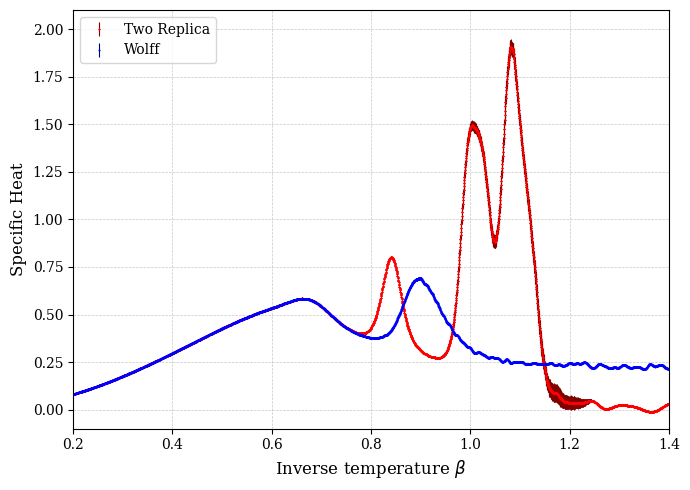

In [1679]:
# Customize plot appearance
plt.rc('text', usetex=False)  # Use LaTeX for all text
plt.rc('font', family='serif', size=10)  # Use serif fonts with size 10
plt.rc('axes', labelsize=12)  # Axis label size
plt.rc('legend', fontsize=10)  # Legend font size

fig, ax1 = plt.subplots(figsize=(7, 5))  # Adjust the figure size for the journal aspect ratio

# Plot the first dataset with error bars
ax1.errorbar(beta_model, unbiased_obs_1, se_obs_1, 
             linewidth=0, elinewidth=0.8, 
             marker='x', markersize=1, 
             color="red", ecolor="maroon", 
             label=r"Two Replica")

# Plot the second dataset with error bars
ax1.errorbar(beta_model, unbiased_obs_2, se_obs_2, 
             linewidth=0, elinewidth=0.8, 
             marker='.', markersize=1, 
             color="blue", ecolor="navy", 
             label=r"Wolff")

# Axis labels
ax1.set_xlabel(r"Inverse temperature $\beta$", fontsize=12)
ax1.set_ylabel(header, fontsize=12)

# Limits and grid
ax1.set_xlim(0.2, 1.4)
ax1.set_ylim(-0.1, 2.1)
ax1.grid(visible=True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)

# Title with LaTeX formatting
# ax1.set_title(rf"Unbiased Estimator with Standard Error for {header}" +f"\n"
#               + rf"$\kappa = {kappa}$, $L = {L}$, $R = {R}$", fontsize=11)

# Legend
ax1.legend(loc='upper left', frameon=True)

from fractions import Fraction
if quantity == 11:
    ax1.hlines(y = np.arange(((L/8)+1)/L, ((L/4)+1)/L, 1/L), xmin = 0, xmax = 2.5, linewidth = 1, linestyle = 'dashed', alpha = 0.6, color = "black")
    # for i in np.arange(((L/8)+1)/L, ((L/4)+1)/L, 1/L):
    #     plt.text(0.35, i+0.0024, f'{str(int(i*L))}/{str(L)}', ha='left', va='center')
    ax1.set_yticks(ticks = np.arange(((L/8)+1)/L, ((L/4)+1)/L, 1/L), labels = (f'{str(int(i*L))}/{str(L)}' for i in np.arange(((L/8)+1)/L, ((L/4)+1)/L, 1/L)))
# Optimize layout and save
plt.tight_layout()
from datetime import date
datestr = date.today().strftime("%d%b%y")
descriptor = "spec-heat-comparison"
print(datestr)
if kappa == 0.6:
    kappafilestr = "k-0-6"
elif kappa == 0:
    kappafilest = "k-0"
plt.savefig(f"/Users/shanekeiser/Documents/ANNNI/figures/{datestr}_{descriptor}_{kappafilestr}_L-{L}_R-{R}.png", dpi=300)  # Save in high resolution
plt.show()

In [1050]:
## Find peaks in specific heat


def findLocalMaxima(ue, se):

    for i in range(1,N_steps-1):
        if ue[i] > ue[i-1] and ue[i] >ue[i+1] and beta_model[i] < 1.4:
            print(f"{ue[i]} +/- {se[i]}, beta = {beta_model[i]}")

findLocalMaxima(unbiased_obs_2, se_obs_2)

0.5738928210854771 +/- 0.00010531958003189041, beta = 0.6429429429429429
0.580882514341177 +/- 0.00010005943195858248, beta = 0.6573573573573573
0.5833530099831741 +/- 0.00012023478215527015, beta = 0.6621621621621621
0.5837290370210712 +/- 0.00010875948749235296, beta = 0.6669669669669669
0.3810375364822208 +/- 0.0005859856166852544, beta = 0.7966966966966966
0.705646153611623 +/- 0.0009330031433370012, beta = 0.8903903903903904
0.7038448114585779 +/- 0.0008841943911663319, beta = 0.8951951951951952
0.4707730286958632 +/- 0.0004931865781973376, beta = 0.9576576576576576
0.4161917832540168 +/- 0.0006933184377519904, beta = 0.9888888888888888
0.3767355336122536 +/- 0.00047635003709883974, beta = 1.0153153153153154
0.3430234769676408 +/- 0.0004200836505732272, beta = 1.0537537537537538
0.3244542039398679 +/- 0.000378913634985804, beta = 1.0705705705705706
0.3057521055165612 +/- 0.0003414624760332347, beta = 1.0873873873873874
0.30793779729288606 +/- 0.0003558367311976546, beta = 1.099399

In [1712]:
### Comparing across R values


kappa = 0.6
L = 48
R = 16000
quantity = 11
mode = "p"
modestr = "Two Replica Method" if (mode == "t") else "Wolff Method"
modestr = "Two-Replica_Method" if (mode == "t") else "Wolff_Method"
dirpath = f"/Users/shanekeiser/Downloads/production-run/{modestr}/{kappastr}_kappa/{L}_L/{R}_R"
filepattern = f"emcx_data_*"
files = glob.glob(f"{dirpath}/{filepattern}")
# print(files)
df_example = pd.read_csv(files[0])
header = list(df_example)[quantity]
print(header)

R_vals = np.array([4000,8000,16000])
unbiased_observables = np.empty(shape = (N_steps,len(R_vals)))
standard_errors = np.empty(shape = (N_steps,len(R_vals)))
for i in range(len(R_vals)):
    unbiased_observables[:,i], standard_errors[:,i] = getUnbiasedEstimate(kappa = kappa, L = L, R = R_vals[i], mode = mode, quantity = quantity)
    

Dominant Frequency
No. of datasets = 200
No. of datasets = 186
No. of datasets = 180


13Dec24


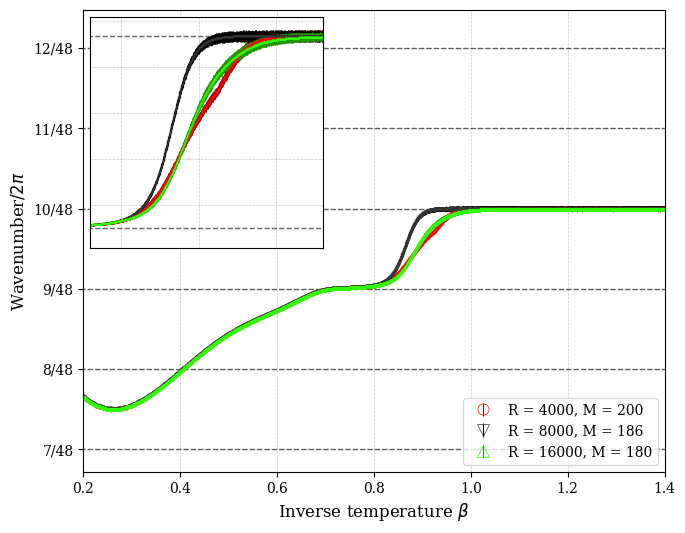

In [1714]:
# Customize plot appearance
plt.rc('text', usetex=False)  # Use LaTeX for all text
plt.rc('font', family='serif', size=10)  # Use serif fonts with size 10
plt.rc('axes', labelsize=12)  # Axis label size
plt.rc('legend', fontsize=10)  # Legend font size

fig, ax1 = plt.subplots(figsize=(7.5, 6))  # Adjust the figure size for the journal aspect ratio

from matplotlib.cm import get_cmap
# colors = get_cmap("Set1", len(R_vals)+1)
colors =  np.array(["#fa0707", "#363636", "#30fc03", "#0207fa"])#, "#f757f2", "#0dffef", "#ffaa0d"])
ecolors = np.array(["#960404", "#050505", "#1c9701", "#01037d"])
markers = ["o", "v", "^", "s", "P", "X"]

inset = True
if inset == True:
    from mpl_toolkits.axes_grid1.inset_locator import inset_axes
    inset_ax = inset_axes(ax1, width="40%", height="50%", loc='upper left')
    # inset_ax.set_xlim(0.92, 1.21)  # Zoom in on the region of interest
    inset_ax.set_xlim(0.76, 1.06)  # Zoom in on the region of interest
    # inset_ax.set_ylim(9.9/48, 12.1/48)
    inset_ax.set_ylim(8.9/48, 10.1/48)
    inset_ax.grid(visible=True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)
    inset_ax.tick_params(left=False, right=False, top=False, bottom=False, labelleft=False, labelbottom=False)

if mode == "t":
    M_vals = np.array([200,197,196])
elif mode == "p":
    M_vals = np.array([200,186,180])
# Plot the first dataset with error bars
for i in range(len(R_vals)):
    ax1.errorbar(beta_model, unbiased_observables[:,i], standard_errors[:,i], 
                linewidth=0.1, elinewidth=0.8, 
                marker=markers[i], markersize=2, 
                color='none', ecolor=ecolors[i], 
                mec = colors[i], mew = 0.5,
                label=f"R = {R_vals[i]}, M = {M_vals[i]}")
    if inset == True:
        inset_ax.errorbar(beta_model, unbiased_observables[:,i], standard_errors[:,i], 
                linewidth=0.1, elinewidth=0.8, 
                marker=markers[i], markersize=1, 
                color='none', ecolor=ecolors[i], 
                mec = colors[i], mew = 0.5,
                label=f"R = {R_vals[i]}, M = {M_vals[i]}")


# Axis labels
ax1.set_xlabel(r"Inverse temperature $\beta$", fontsize=12)
ax1.set_ylabel(f"{header}", fontsize=12)

# Limits and grid
ax1.set_xlim(0.2, 1.4)
ax1.set_ylim(0.14,0.26)
# ax1.set_ylim(0,4)

ax1.grid(visible=True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)

# Title with LaTeX formatting
# ax1.set_title(rf"Unbiased Estimator with Standard Error for {header}" +f"\n"
#               + rf"$\kappa = {kappa}$, $L = {L}$, {modestr}", fontsize=11)

# Legend
ax1.legend(loc='lower right', frameon=True, markerscale = 4)

from fractions import Fraction
if quantity == 11:
    ax1.hlines(y = np.arange(((L/8)+1)/L, ((L/4)+1)/L, 1/L), xmin = 0, xmax = 2.5, linewidth = 1, linestyle = 'dashed', alpha = 0.6, color = "black")
    # ax1.set_title(rf"Unbiased Estimator with Standard Error for Dominant Wavenumber" +f"\n"
    #           + rf"$\kappa = {kappa}$, $L = {L}$, {modestr}", fontsize=11)
    ax1.set_ylabel(r"Wavenumber$/2\pi$", fontsize=12)
    if inset == True:
        inset_ax.hlines(y = np.arange(((L/8)+1)/L, ((L/4)+1)/L, 1/L), xmin = 0, xmax = 2.5, linewidth = 1, linestyle = 'dashed', alpha = 0.6, color = "black")
        ax1.set_yticks(ticks = np.arange(((L/8)+1)/L, ((L/4)+1)/L, 1/L), labels = (f'{str(int(i*L))}/{str(L)}' for i in np.arange(((L/8)+1)/L, ((L/4)+1)/L, 1/L)))
# Optimize layout and save


# plt.tight_layout()
from datetime import date
datestr = date.today().strftime("%d%b%y")
descriptor = f"{header}-{modestr}"
print(datestr)
if kappa == 0.6:
    kappafilestr = "k-0-6"
elif kappa == 0:
    kappafilest = "k-0"
plt.savefig(f"/Users/shanekeiser/Documents/ANNNI/figures/{datestr}_{descriptor}_{kappafilestr}_L-{L}_R-comparison.png", dpi=300)  # Save in high resolution
plt.show()

In [1700]:
### Comparing specific heat and dominant frequency  

kappa = 0.6
kappastr = f"{kappa:.2f}"
L = 96
R =  32000
mode = "t"
modestr = "Two-Replica_Method" if (mode == "t") else "Wolff_Method"
quantity = 6
df_example = pd.read_csv(files[0])
header = list(df_example)[quantity]
print(header)



unbiased_obs_3, se_obs_3 = getUnbiasedEstimate(kappa = kappa, L = L, R = R, mode = mode, quantity = 6)
unbiased_obs_4, se_obs_4 = getUnbiasedEstimate(kappa = kappa, L = L, R = R, mode = mode, quantity = 11)
# unbiased_obs_5, se_obs_5 = getUnbiasedEstimate(kappa = kappa, L = 32, R = R, mode = mode, quantity = 6)
# unbiased_obs_5, se_obs_5 = getUnbiasedEstimate(kappa = kappa, L = L, R = 16000, mode = mode, quantity = quantity)
# print(se_obs_1)


Specific Heat
No. of datasets = 100
No. of datasets = 100


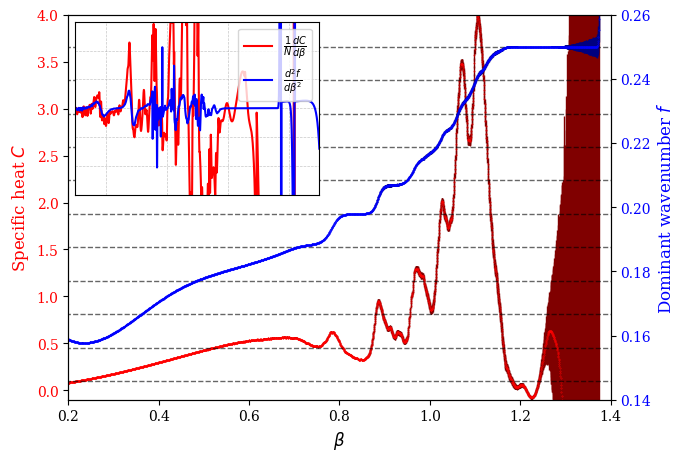

In [1701]:
fig, ax1 = plt.subplots(figsize = (7,5))
ax1.errorbar(beta_model, unbiased_obs_3, se_obs_3, linewidth = 0, elinewidth = 1, marker = '.', markersize = 0.6, color = "red", ecolor = "maroon")
ax1.set_ylabel(r"Specific heat $C$", color = "red")
ax1.tick_params(axis='y', labelcolor="red")
ax1.set_ylim(-0.1,4)
ax1.set_xlim(0.2,1.4)
ax1.set_xlabel(r"$\beta$")
ax2 = ax1.twinx()
ax2.errorbar(beta_model, unbiased_obs_4, se_obs_4, linewidth = 0, elinewidth = 1, marker = '.', markersize = 0.6, color = "blue", ecolor = "navy")
ax2.hlines(y = np.arange(((L/4)-(L/8))/L, ((L/4)+1)/L, 1/L), xmin = 0, xmax = 2.5, linewidth = 1, linestyle = 'dashed', alpha = 0.6, color = "black")
ax2.set_ylabel(r"Dominant wavenumber $f$", color = "blue")

ax2.set_ylim(0.14,0.26)
ax2.tick_params(axis='y', labelcolor="blue")


from mpl_toolkits.axes_grid1.inset_locator import inset_axes
inset_ax = inset_axes(ax2, width="45%", height="45%", loc='upper left')
inset_ax.set_xlim(0.7,1.5)
inset_ax.set_ylim(-0.00003,0.00003)
inset_ax.grid(visible=True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)
inset_ax.tick_params(left=False, right=False, top=False, bottom=False, labelleft=False, labelbottom=False)
inset_ax.plot(beta_model, np.gradient(unbiased_obs_3)/(32*32), color = 'r', label = r'$\frac{1}{N}\frac{dC}{d\beta}$')
inset_ax.plot(beta_model, np.gradient(np.gradient(unbiased_obs_4)), color = 'b', label = r'$\frac{d^2 f}{d\beta^2}$')
inset_ax.legend(loc = "upper right")
# ax1.set_title(f"Unbiased estimator with standard error for {header}\n" + rf"$\kappa$ = {kappa}, L = {L}, R = {R}, {modestr}")
# ax1.text(x = 0.1, y = 1.6, s = "Specific heat using\nvariance re-weighting scheme", bbox = dict(facecolor='red', alpha=0.5))
plt.savefig(f"/Users/shanekeiser/Documents/ANNNI/figures/{datestr}_deriv-comparison_k-0-6_L-{L}_R-{R}.png", dpi=300)  # Save in high resolution

plt.show()

In [1063]:
grad_C = np.gradient(unbiased_obs_3)/(32*32)
# print(grad_C)
grad2_domfreq = np.gradient(np.gradient(unbiased_obs_4))

def findZeros(arr, arr2):
    for i in range(len(arr)):
        if  np.abs(arr[i]) <= 1e-6 and 0.6 < beta_model[i] < 1.2 and np.abs(arr2[i]) <= 1e-6:
            print(arr[i], arr2[i], beta_model[i])

findZeros(grad_C, grad2_domfreq)

9.373500981502939e-07 5.618889734743115e-07 0.6573573573573573
-9.953180772566178e-07 2.1143802129280909e-07 0.9264264264264264
-6.295568825976901e-07 5.638536566404673e-07 0.9288288288288288


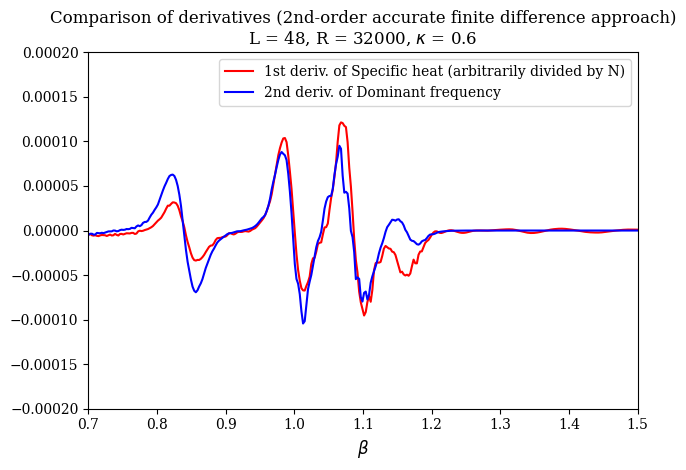

In [910]:
# Plot between different derivatives
plt.plot(beta_model, np.gradient(unbiased_obs_3)/(32*32), color = 'r', label = '1st deriv. of Specific heat (arbitrarily divided by N)')
#ax2 = ax1.twiny()
plt.plot(beta_model, np.gradient(np.gradient(unbiased_obs_4)), color = 'b', label = '2nd deriv. of Dominant frequency')
plt.legend()
plt.title("Comparison of derivatives (2nd-order accurate finite difference approach)\n" + r"L = 48, R = 32000, $\kappa$ = 0.6")
plt.xlabel(r"$\beta$")
plt.tight_layout()
plt.xlim(0.7,1.5)
plt.ylim(-0.0002,0.0002)
plt.show()

In [1456]:
def getUnbiasedFE(kappa,L,R,mode):
    kappastr = f"{kappa:.2f}"
    modestr = "Two-Replica_Method" if (mode == "t") else "Wolff_Method"
    dirpath = f"/Users/shanekeiser/Downloads/production-run/{modestr}/{kappastr}_kappa/{L}_L/{R}_R"
    filepattern = f"emcx_data_*"
    files = glob.glob(f"{dirpath}/{filepattern}")
    beta_model = np.linspace(0.1,2.5,N_steps)   
    FE_interp_vals = np.empty(shape = (len(files), N_steps))
    unbiased_FE = np.empty(N_steps)
    for i in range(len(files)):
        # print(files[i])
        df = pd.read_csv(files[i])
        betas = df["Beta"][:-3]
        FE = df["Free Energy"][:-3] # need to manipulate F a little, based on what is calculated in C++
        FE_interp = make_interp_spline(betas,FE,k=3)
        FE_model = FE_interp(beta_model)
        FE_interp_vals[i,:] = FE_model
    
    for i in range(N_steps):
        # unbiased_FE[i] = np.log((1/len(files))*np.sum(np.exp(FE_interp_vals[:,i]))) # Has overflow from too large numbers
        unbiased_FE[i] = -np.log(len(files)) + np.max(FE_interp_vals[:,i]) + np.log(np.sum(np.exp(FE_interp_vals[:,i] - np.max(FE_interp_vals[:,i]))))
        unbiased_FE[i] *= -1/beta_model[i]
        unbiased_FE[i]

    ### Bootstrap method
    ### Bootstrap method
    B = 100

    
    bootstrap_obs = np.zeros(shape = (B,N_steps))
    se_FE_bootstrap = np.zeros(shape = N_steps)
    bootmean_std = np.zeros(len(unbiased_FE))
    for i in range(N_steps):
        sample = FE_interp_vals[:,i]
        boot_means = []
        for _ in range(B):
            bootsample = np.random.choice(sample,size=len(sample), replace=True)
            boot_means.append(bootsample.mean())
        bootmean_std[i] = np.std(boot_means,ddof = 1)
    se_FE_bootstrap = bootmean_std
    # print(B)
    # N_samples = 30

    # bootstrap_obs = np.zeros(shape = (B,N_steps))
    # se_obs_bootstrap = np.zeros(shape = N_steps)

    # for i in range(B):
    #     for j in range(N_steps):
    #         for k in range(N_samples):
    #             r = np.random.randint(0,len(files))
    #             bootstrap_obs[i,j] += FE_interp_vals[r,j]
    # bootstrap_obs /= N_samples

    # # print(bootstrap_obs)
    # for i in range(N_steps):
    #     se_obs_bootstrap[i] = np.sqrt((np.std(bootstrap_obs[:,i])**2)/(B-1))
    # # print(B)
    return unbiased_FE, se_FE_bootstrap





In [1632]:
kappa_FE = 0.6
L_FE = 48
R_FE = 16000
ue_FE_1, se_FE_1 = getUnbiasedFE(kappa = kappa_FE, L = L_FE, R = R_FE, mode = "t")
ue_FE_2, se_FE_2 = getUnbiasedFE(kappa = kappa_FE, L = L_FE, R = R_FE, mode = "p")

11Dec24


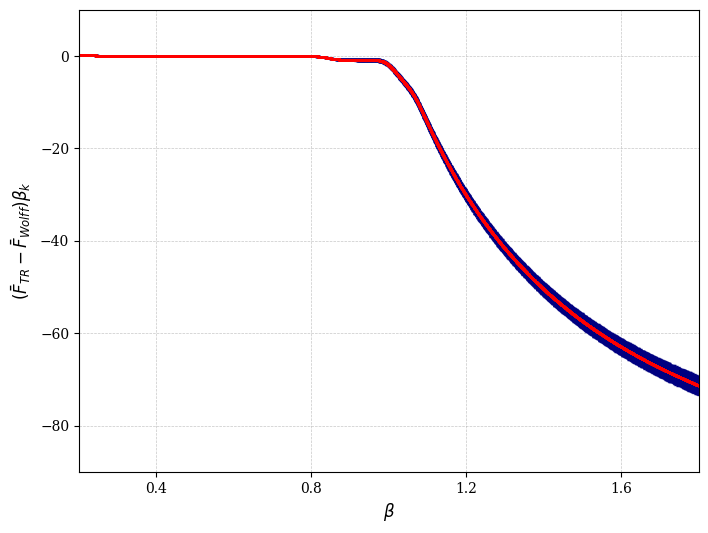

In [1634]:
import matplotlib.pyplot as plt

# Create the plot
fig, ax = plt.subplots(figsize=(8, 6))  # Adjust size to match journal aspect ratio
# ax.errorbar(beta_model, ue_FE_1, se_FE_1, marker='o', markersize=1, linewidth=0, 
#             mfc='none', mec = 'blue', ecolor='navy',
#             elinewidth=0.8, capsize=1, label="Two Replica")
# ax.errorbar(beta_model, ue_FE_2, se_FE_2, marker='s', markersize=1, linewidth=0, 
#             mfc='none', mec = 'red', ecolor='navy',
#             elinewidth=0.8, capsize=1, label="Wolff")
ax.errorbar(beta_model, ue_FE_1 - ue_FE_2, se_FE_1 + se_FE_2, marker='s', markersize=1, linewidth=0, 
            mfc='none', mec = 'red', ecolor='navy',
            elinewidth=0.8, capsize=1, label="Wolff")

# Axis limits and ticks
ax.set_xlim(0.2, 1.8)
ax.set_ylim(-90, 10)  # Adjust as necessary based on your data
ax.xaxis.set_major_locator(plt.MaxNLocator(5))
ax.yaxis.set_major_locator(plt.MaxNLocator(5))

# Labels and title
ax.set_xlabel(r"$\beta$", fontsize=12)
ax.set_ylabel(r"$(\bar{F}_{TR} - \bar{F}_{Wolff})\beta_k$", fontsize=12)
# ax.set_title(f"Difference in Unbiased Estimator of Free Energy\nL = {L_FE}, R = {R_FE}, " 
#              + r"$\kappa$ = " + f"{kappa_FE}", fontsize=14)

# Legend
# ax.legend(markerscale=3, loc='lower left', fontsize=10, frameon=True)
# Styling
ax.tick_params(axis='both', which='major', labelsize=10)
ax.grid(visible=True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)



# inset_ax = inset_axes(ax, width="42%", height="49%", loc='upper right')
# inset_ax.set_xlim(0.85,1.05)
# inset_ax.set_ylim(-15,0)
# inset_ax.grid(visible=True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)
# # inset_ax.tick_params(left=False, right=False, top=False, bottom=False, labelleft=False, labelbottom=False)
# # inset_ax.errorbar(beta_model, ue_FE_1, se_FE_1, marker='o', markersize=1, linewidth=0, 
# #             color='none', mec = 'blue', ecolor='navy',
# #             elinewidth=0.8, capsize=1, label="Two Replica")
# # inset_ax.errorbar(beta_model, ue_FE_2, se_FE_2, marker='s', markersize=1, linewidth=0, 
# #             color='none', mec = 'red', ecolor='navy',
# #             elinewidth=0.8, capsize=1, label="Wolff")
# inset_ax.errorbar(beta_model, ue_FE_1 - ue_FE_2, se_FE_1 + se_FE_2, marker='s', markersize=1, linewidth=0, 
#             color='none', mec = 'red', ecolor='navy',
#             elinewidth=0.8, capsize=1, label="Wolff")
# inset_ax.set_yticks([-15,0])
# inset_ax.set_xticks([0.9,0.95,1.0])




# Save plot
from datetime import date
datestr = date.today().strftime("%d%b%y")
descriptor = "FE-comparison"
print(datestr)
if kappa == 0.6:
    kappafilestr = "k-0-6"
elif kappa == 0:
    kappafilest = "k-0"
plt.savefig(f"/Users/shanekeiser/Documents/ANNNI/figures/{datestr}_{descriptor}_{kappafilestr}_L-{L_FE}_R-{R_FE}.png", dpi=300)  # Save in high resolution
# plt.tight_layout()  # Optimize spacing
# Display the plot
plt.show()


In [1599]:
# Compare FE across R values

kappa = 0.6
L = 48
quantity = 6
df_example = pd.read_csv(files[0])
header = list(df_example)[quantity]
print(header)
mode = "p"
R_vals = np.array([4000,8000,16000])
modestr = "Two Replica" if (mode == "t") else "Wolff"
unbiased_FEs = np.empty(shape = (N_steps,len(R_vals)))
se_FEs= np.empty(shape = (N_steps,len(R_vals)))
for i in range(len(R_vals)):
    unbiased_FEs[:,i], se_FEs[:,i] = getUnbiasedFE(kappa = kappa, L = L, R = R_vals[i], mode = mode)


Specific Heat


/var/folders/fk/md7wtpb54yb3hp5d33lb9v200000gn/T/ipykernel_72646/719041937.py:64: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


11Dec24


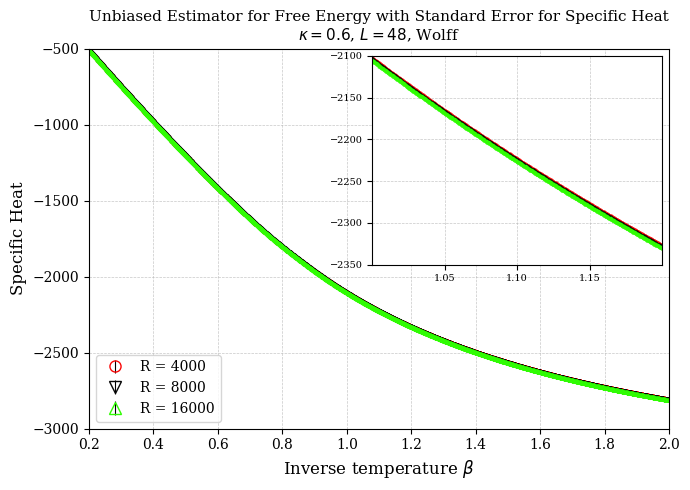

In [1600]:
# Customize plot appearance
plt.rc('text', usetex=False)  # Use LaTeX for all text
plt.rc('font', family='serif', size=10)  # Use serif fonts with size 10
plt.rc('axes', labelsize=12)  # Axis label size
plt.rc('legend', fontsize=10)  # Legend font size

fig, ax1 = plt.subplots(figsize=(7, 5))  # Adjust the figure size for the journal aspect ratio

from matplotlib.cm import get_cmap
colors = np.array(["#fa0707", "#050505", "#30fc03", "#0207fa", "#f757f2", "#0dffef", "#ffaa0d"])
markers = ["o", "v", "^", "s", "P", "X"]

inset = True
if inset == True:
    from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset
    from matplotlib import patches
    inset_ax = inset_axes(ax1, width="50%", height="55%", loc='upper right')
    inset_ax.set_xlim(1.0, 1.2)  # Zoom in on the region of interest
    inset_ax.set_ylim(-2350,-2100)
    inset_ax.grid(visible=True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)
    # inset_ax.tick_params(left=False, right=False, top=False, bottom=False, labelleft=False, labelbottom=False)
    inset_ax.tick_params(labelsize = 7)
    inset_ax.set_xticks([1.05,1.1,1.15])
    pos = inset_ax.get_position()  # Get the current position
    new_pos = [pos.x0 - 0.9, pos.y0, pos.width, pos.height]  # Shift left by 0.05 units
    inset_ax.set_position(new_pos)


# Plot the first dataset with error bars
for i in range(len(R_vals)):
    ax1.errorbar(beta_model, unbiased_FEs[:,i], se_FEs[:,i], 
                linewidth=0, elinewidth=0.8, 
                marker=markers[i], markersize=2, 
                mfc='none', mec = colors[i], ecolor="black", 
                label=f"R = {R_vals[i]}")
    if inset == True:
        inset_ax.errorbar(beta_model, unbiased_FEs[:,i], se_FEs[:,i], 
                linewidth=0, elinewidth=0.8, 
                marker=markers[i], markersize=2, 
                mfc='none', mec = colors[i], ecolor="black", 
                label=f"R = {R_vals[i]}")
        


# Axis labels
ax1.set_xlabel(r"Inverse temperature $\beta$", fontsize=12)
ax1.set_ylabel(header, fontsize=12)

# Limits and grid
ax1.set_xlim(0.2, 2.0)
ax1.set_ylim(-3000,-500)

ax1.grid(visible=True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)

# Title with LaTeX formatting
ax1.set_title(rf"Unbiased Estimator for Free Energy with Standard Error for {header}" +f"\n"
              + rf"$\kappa = {kappa}$, $L = {L}$, {modestr}", fontsize=11)

# Legend
ax1.legend(loc='lower left', frameon=True, markerscale = 4)



plt.tight_layout()
from datetime import date
datestr = date.today().strftime("%d%b%y")
descriptor = f"FE-{modestr}"
print(datestr)
if kappa == 0.6:
    kappafilestr = "k-0-6"
elif kappa == 0:
    kappafilest = "k-0"
plt.savefig(f"/Users/shanekeiser/Documents/ANNNI/figures/{datestr}_{descriptor}_{kappafilestr}_L-{L}_R-comparison.png", dpi=300)  # Save in high resolution
plt.show()

In [1641]:
### Get all wrapping possibilities

kappa = 0.6
L = 48
R = 16000
quantity = 19
# df_example = pd.read_csv(files[0])
# header = list(df_example)[quantity]
# print(header)
mode = "p"
modestr = "Two Replica" if (mode == "t") else "Wolff"

unbiased_xbarzbar, se_xbarzbar = getUnbiasedEstimate(kappa = kappa, L = L, R = R, mode = mode, quantity = 10)
unbiased_xbarz, se_xbarz = getUnbiasedEstimate(kappa = kappa, L = L, R = R, mode = mode, quantity = 19)
unbiased_xzbar, se_xzbar = getUnbiasedEstimate(kappa = kappa, L = L, R = R, mode = mode, quantity = 20)
unbiased_xz, se_xz = getUnbiasedEstimate(kappa = kappa, L = L, R = R, mode = mode, quantity = 21)

unbiased_total = unbiased_xbarzbar + unbiased_xbarz + unbiased_xzbar + unbiased_xz
se_total = se_xbarzbar + se_xbarz + se_xzbar + se_xz



No. of datasets = 180
No. of datasets = 180
No. of datasets = 180
No. of datasets = 180


11Dec24


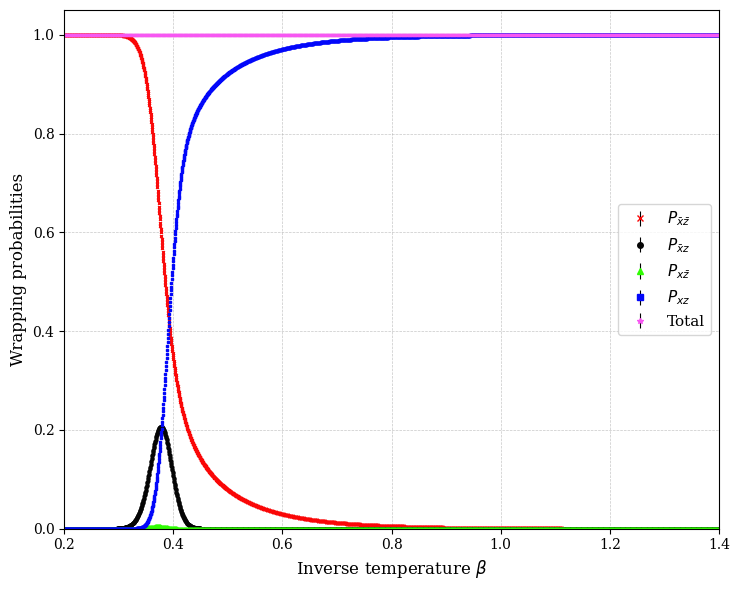

In [1642]:
# Customize plot appearance
plt.rc('text', usetex=False)  # Use LaTeX for all text
plt.rc('font', family='serif', size=10)  # Use serif fonts with size 10
plt.rc('axes', labelsize=12)  # Axis label size
plt.rc('legend', fontsize=10)  # Legend font size

fig, ax1 = plt.subplots(figsize=(7.5, 6))  # Adjust the figure size for the journal aspect ratio

from matplotlib.cm import get_cmap
colors = np.array(["#fa0707", "#050505", "#30fc03", "#0207fa", "#f757f2", "#0dffef", "#ffaa0d"])
markers = ["x", "o", "^", "s", "*", "3"]



ax1.errorbar(beta_model, unbiased_xbarzbar, se_xbarzbar,
            linewidth=0, elinewidth=0.8, 
            marker=markers[0], markersize=2, 
            color=colors[0], ecolor="black", 
            label=r"$P_{\bar{x}\bar{z}}$")

ax1.errorbar(beta_model, unbiased_xbarz, se_xbarz,
            linewidth=0, elinewidth=0.8, 
            marker=markers[1], markersize=2, 
            color=colors[1], ecolor="black", 
            label=r"$P_{\bar{x}z}$")

ax1.errorbar(beta_model, unbiased_xzbar, se_xzbar,
            linewidth=0, elinewidth=0.8, 
            marker=markers[2], markersize=2, 
            color=colors[2], ecolor="black", 
            label=r"$P_{x\bar{z}}$")

ax1.errorbar(beta_model, unbiased_xz, se_xz,
            linewidth=0, elinewidth=0.8, 
            marker=markers[3], markersize=2, 
            color=colors[3], ecolor="black", 
            label=r"$P_{xz}$")

ax1.errorbar(beta_model, unbiased_total, se_total,
            linewidth=0, elinewidth=0.8, 
            marker=markers[4], markersize=2, 
            color=colors[4], ecolor="black", 
            label=r"Total")
        


# Axis labels
ax1.set_xlabel(r"Inverse temperature $\beta$", fontsize=12)
ax1.set_ylabel("Wrapping probabilities", fontsize=12)

# Limits and grid
ax1.set_xlim(0.2, 1.4)
ax1.set_ylim(0,1.05)

ax1.grid(visible=True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)

# Title with LaTeX formatting
# ax1.set_title(rf"Unbiased Estimator for wrapping probabilities with Standard Error" +f"\n"
#               + rf"$\kappa = {kappa}$, $L = {L}$, $R = {R}$, {modestr}", fontsize=11)

# Legend
ax1.legend(loc='center right', frameon=True, markerscale = 2, prop={'size': 11})


plt.tight_layout()
from datetime import date
datestr = date.today().strftime("%d%b%y")
descriptor = f"wrapping-probs-{modestr}"
print(datestr)
if kappa == 0.6:
    kappafilestr = "k-0-6"
elif kappa == 0:
    kappafilest = "k-0"
plt.savefig(f"/Users/shanekeiser/Documents/ANNNI/figures/{datestr}_{descriptor}_{kappafilestr}_L-{L}_R-{R}.png", dpi=300)  # Save in high resolution
plt.show()

In [1355]:
kappa = 0.6
L = 48
R = 16000
mode = "t"

kappastr = f"{kappa:.2f}"
modestr = "Two-Replica_Method" if (mode == "t") else "Wolff_Method"
dirpath = f"/Users/shanekeiser/Downloads/production-run/{modestr}/{kappastr}_kappa/{L}_L/{R}_R"
filepattern = f"emcx_data_*"
files = glob.glob(f"{dirpath}/{filepattern}")

print(len(files))

# df = pd.read_csv(files[0])
# cs_avg = 0
# for i in range(len(files)):
#     df = pd.read_csv(files[i])
#     cs = np.array(df["Cluster Size"])
#     cs_avg += cs[-1]
#     print(cs[-1])
# cs_avg /= len(files)
# print(cs_avg)

196


Two replica
L = 48, R = 16000: 196
L = 48, R = 8000: 197
L = 48, R = 4000: 200

Wolff
L = 48, R = 16000: 180
L = 48, R = 8000: 186
L = 48, R = 4000: 200

Want: 200 of each
